<a href="https://colab.research.google.com/github/johntango/PS2HouseDataExercise/blob/master/Predict_House_Prices_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [39]:
data = pd.read_csv('train.csv')
train = data.iloc[:1000,:]
answers = data.iloc[1000:,:]

train.to_json('housedata.json')
train.shape
train.head()

#data to test on
test_data = pd.read_csv('test.csv')
test = test_data.iloc[:,:]
test.to_json('housedata_test.json')

answers['SalePrice'].to_json('answers.json')

# New Section

In [38]:
# investigate Sale Price
train['SalePrice']
answers['SalePrice']

1000     82000
1001     86000
1002    232000
1003    136905
1004    181000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 460, dtype: int64

(array([ 99., 493., 254.,  93.,  38.,  15.,   4.,   2.,   1.,   1.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

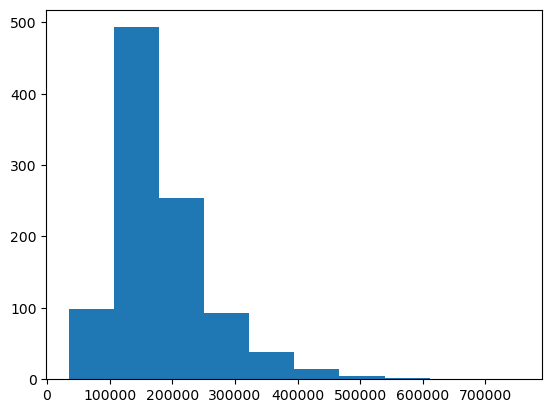

In [4]:
# plot hist
plt.hist(train['SalePrice'])

In [5]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(1000, 38)

In [6]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:40].index
# cast to list
cols = cols.tolist()
print(cols)
used_cols = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'LotArea']

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtUnfSF', 'BsmtFullBath', 'BedroomAbvGr', 'ScreenPorch', 'MoSold', 'PoolArea', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'Id', 'LowQualFinSF', 'YrSold', 'MiscVal', 'MSSubClass', 'OverallCond', 'EnclosedPorch', 'KitchenAbvGr']


In [7]:
# pick out X cols and Y = SalePricee
X = train[used_cols]
Y = train['SalePrice']

In [8]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
# How good is the model
model.score(X,Y)

0.8062320592129006

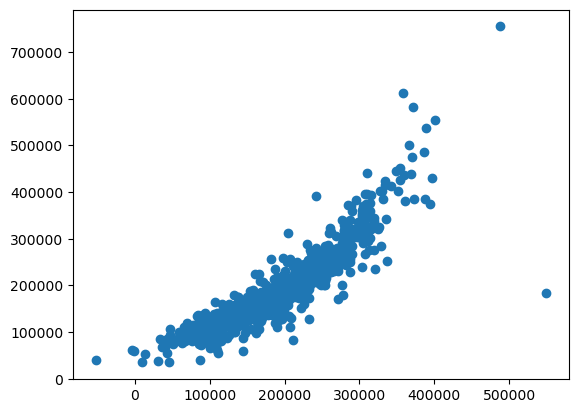

In [9]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

In [43]:
#predict the SalePrice for the test data
test_X = test[used_cols]
test_predictions = model.predict(test_X)

#write the test_predictions to a csv file called predictions.csv with headers ID as int starting from 0 and SALEPRICE as float
#write the test_predictions to a csv file called predictions.csv with headers ID as int starting from 0 and SALEPRICE as float
test['SALEPRICE'] = test_predictions
test['ID'] = test['Id'].astype(int)
test[['ID','SALEPRICE']].to_csv('predictions.csv', index=False)

#write the test_predictions to a csv file called compare.csv with headers ID and SALEPRICE as float and answers as float from answers['SalePrice']
answers['SalePrice'] = answers['SalePrice'].astype(float)

test_df = pd.DataFrame()
test_df['predictions'] = test_predictions
test_df['answers'] = answers['SalePrice'].iloc[:].values
print(test_df.head())

#write the test_predictions to a csv file called compare.csv with headers ID and SALEPRICE as float and answers as float
test_df.to_csv('compare.csv', index=False)

     predictions   answers
0   48831.488765   82000.0
1   70951.273353   86000.0
2  268707.446664  232000.0
3  195067.743068  136905.0
4  214879.458437  181000.0


In [45]:
#calculate the root mean squared error for test['SALEPRICE'] and test['answers']
from sklearn.metrics import mean_squared_error
from math import sqrt
#calculate root mean squared error
rms = sqrt(mean_squared_error(test_df['predictions'], test_df['answers']))
print(rms)

43828.5241133937
